<a href="https://colab.research.google.com/github/minshyee/VGameDataAnalysis-Project/blob/main/game_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving df_use.csv to df_use.csv


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
cf.go_offline


<function cufflinks.offline.go_offline>

In [393]:
df = pd.read_csv('df_use.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40,0,0,0,40
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170,0,0,10,180
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20,0,20
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40,0,0,0,40
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120,90,0,40,250
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150,40,0,10,200
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10,0,0,0,10
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440,190,30,130,790
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50,50,250,30,380


# 지역에 따라 선호하는 게임장르가 다를까


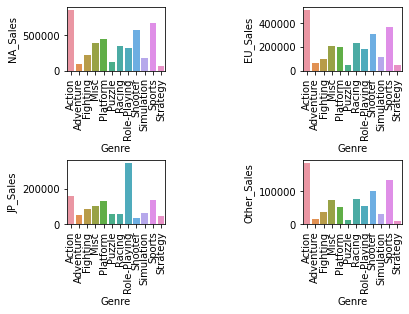

In [42]:
g_byloc = df.loc[:,['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
g_byloc = g_byloc.groupby(df['Genre']).sum().reset_index()
g_byloc

plt.subplot(3,3,1)
sns.barplot(x=g_byloc['Genre'], y=g_byloc['NA_Sales'])
plt.xticks(rotation =90)

plt.subplot(3,3,3)
sns.barplot(x=g_byloc['Genre'], y=g_byloc['EU_Sales'])
plt.xticks(rotation =90)

plt.subplot(3,3,7)
sns.barplot(x=g_byloc['Genre'], y=g_byloc['JP_Sales'])
plt.xticks(rotation =90)

plt.subplot(3,3,9)
sns.barplot(x=g_byloc['Genre'], y=g_byloc['Other_Sales'])
# plt.title("지역 별, 장르 수입액")
plt.xticks(rotation =90)
plt.show()

In [138]:
ch = g_byloc.sort_values('NA_Sales',ascending=False)[:3]
ch = ch[['Genre','NA_Sales']]
ch1 = g_byloc.sort_values('EU_Sales',ascending=False)[:3]
ch1 = ch1[['Genre','EU_Sales']]
ch2 = g_byloc.sort_values('JP_Sales',ascending=False)[:3]
ch2 = ch2[['Genre','JP_Sales']]
ch3 = g_byloc.sort_values('Other_Sales',ascending=False)[:3]
ch3 = ch3[['Genre','Other_Sales']]
chart = pd.concat([ch,ch1,ch2,ch3],ignore_index=True)
chart = pd.melt(chart, id_vars=['Genre']).dropna()
chart

,Genre,variable,value
0,Action,NA_Sales,858748.0
1,Sports,NA_Sales,667258.0
2,Shooter,NA_Sales,574479.0
15,Action,EU_Sales,513638.0
16,Sports,EU_Sales,370969.0
17,Shooter,EU_Sales,310229.0
30,Role-Playing,JP_Sales,342930.0
31,Action,JP_Sales,156600.0
32,Sports,JP_Sales,134760.0
45,Action,Other_Sales,183989.0


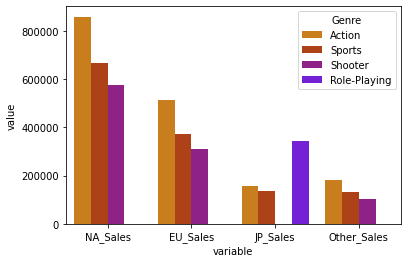

In [373]:
sns.barplot(data=chart,x='variable', y='value', hue='Genre',palette='gnuplot_r')

## 정리
대부분의 나라에서 Action장르가 가장 많은 출고량을 보였으나
일본의 경우 Role-playing 장르가 압도적으로 높은것을 발견하였다.

최대 출고량을 비교했을때 미국과 유럽의 출고량이 일본을 포함한 다른 나라들의 출고량이 2배 이상 높은 수치를 보이고 있음을 알고 있따.

- 그래프 예쁘게 만들기
- 출고량 단위를 변경?


# 연도별 게임의 트렌드가 있을까?


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

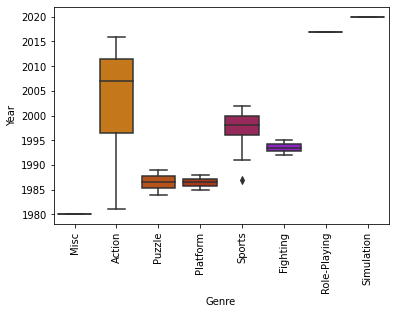

In [372]:
#연도별 게임의 인기출시장르
gcount_by_year = df['Genre'].groupby(df['Year']).value_counts()
gcount_by_year = pd.DataFrame(gcount_by_year)

prev=gcount_by_year.index[0][0]
f_games = [gcount_by_year.index[0]]

for i in range(len(gcount_by_year)):
  if gcount_by_year.index[i][0] != prev:
    prev = gcount_by_year.index[i][0]
    f_games.append(gcount_by_year.index[i])
  else:
    continue

f_games = pd.DataFrame(f_games, columns=['Year','Genre'])

sns.boxplot(y = f_games['Year'], x = f_games['Genre'],palette='gnuplot_r') #box , strip, violin  중 하나로
plt.xticks(rotation =90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

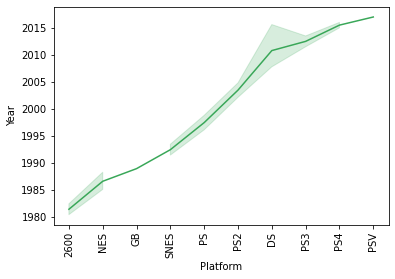

In [382]:
#연도별 게임의 인기출시플랫폼
pcount_by_year = df['Platform'].groupby(df['Year']).value_counts()
pcount_by_year = pd.DataFrame(pcount_by_year)

prev=pcount_by_year.index[0][0]
f_games = [pcount_by_year.index[0]]

for i in range(len(pcount_by_year)):
  if pcount_by_year.index[i][0] != prev:
    prev = pcount_by_year.index[i][0]
    f_games.append(pcount_by_year.index[i])
  else:
    continue

f_games = pd.DataFrame(f_games, columns=['Year','Platform'])

sns.lineplot(y = f_games['Year'], x = f_games['Platform'],palette='gnuplot_r') #box , strip, violin  중 하나로
plt.xticks(rotation =90)

In [ ]:
pcount_by_year.tail(50)

# 출고량이 높은 게임에 대한 분석 및 시각화

In [10]:
df_sales = df.sort_values('total_sales',ascending=False).reset_index(drop=True)

In [59]:
df_sales_top10 = df_sales[:1624]
df_sales_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41490,29020,3770,8460,82740
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080,3580,6810,770,40240
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850,12880,3790,3310,35830
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750,11010,3280,2960,33000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270,8890,10220,1000,31380
...,...,...,...,...,...,...,...,...,...,...
1619,Super Street Fighter IV: 3D Edition,3DS,2011,Fighting,Capcom,550,440,140,90,1220
1620,SimCity 2000,PS,1996,Simulation,Maxis,680,460,0,80,1220
1621,Golden Sun: The Lost Age,GBA,2002,Role-Playing,Nintendo,610,270,270,70,1220
1622,Game & Watch Gallery 2,GB,1997,Misc,Nintendo,760,300,120,40,1220


In [ ]:
year = pd.DataFrame(df_sales_top10['Year'].value_counts()).reset_index()
year

Text(0, 0.5, 'Count')

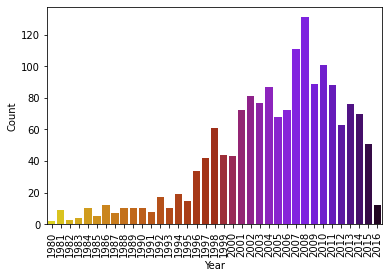

In [371]:
#출고량 상위 10% 게임이 출시된 연도
sns.barplot(data=year,x="index",y="Year",palette='gnuplot_r')
plt.xticks(rotation =90)
plt.xlabel('Year')
plt.ylabel('Count')

In [ ]:
genre = pd.DataFrame(df_sales_top10['Genre'].value_counts()).reset_index()
genre

Text(0, 0.5, 'Count')

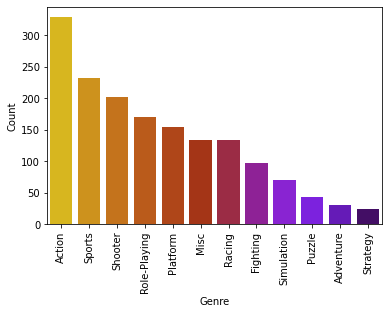

In [370]:
#출고량 상위 10% 게임의 장르
sns.barplot(data=genre,x="index",y="Genre",palette='gnuplot_r')
plt.xticks(rotation =90)
plt.xlabel('Genre')
plt.ylabel('Count')

In [ ]:
#출고량 상위 10%의 게임 platform
platform = pd.DataFrame(df_sales_top10['Platform'].value_counts()).reset_index()
platform

Text(0, 0.5, 'Count')

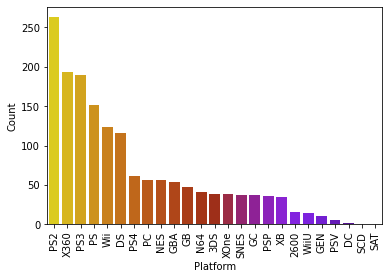

In [369]:
sns.barplot(data=platform,x="index",y="Platform",palette='gnuplot_r')
plt.xticks(rotation =90)
plt.xlabel('Platform')
plt.ylabel('Count')

# 최근 경향 파악하기
(5년간의 경향)


In [110]:
df_sales_new = df.sort_values('Year',ascending=False).reset_index(drop=True)
df_sales_new = df_sales_new[:956]
df_sales_new

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,270,0,0,20,290
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,30,0,30
2,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,10,0,10
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,10,0,10
4,Hatsune Miku: Project Diva X,PS4,2016,Misc,Sega,10,0,20,0,30
...,...,...,...,...,...,...,...,...,...,...
951,"Horse Life 4: My Horse, My Friend, My Champion",3DS,2015,Action,Unknown,0,10,0,0,10
952,Dragon Ball: XenoVerse,PS4,2015,Fighting,Namco Bandai Games,300,480,120,150,1050
953,Thomas and Friends: Steaming around Sodor,3DS,2015,Action,Avanquest Software,0,20,0,0,20
954,Rugby League Team Manager 2015,PC,2015,Action,Alternative Software,0,20,0,0,20


In [266]:
df_sales_new = df_sales_new.sort_values('total_sales',ascending=False)
df_sales_new.reset_index(inplace=True,drop=True)
df_sales_new

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770,5810,350,2310,14240
1,FIFA 16,PS4,2015,Sports,Electronic Arts,1110,6060,60,1260,8490
2,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2930,3290,220,1230,7670
3,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4520,2090,10,670,7290
4,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2470,3150,240,1100,6960
...,...,...,...,...,...,...,...,...,...,...
951,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0,10,0,0,10
952,One Piece: Daikaizoku Coliseum,3DS,2016,Fighting,Namco Bandai Games,0,0,10,0,10
953,God Eater Off Shot: Soma Shikkuzaru-hen Twin P...,PS4,2016,Action,Namco Bandai Games,0,0,10,0,10
954,The Technomancer,PC,2016,Role-Playing,Focus Home Interactive,0,10,0,0,10


In [ ]:
genre_s = pd.DataFrame(df_sales_new['Genre'].value_counts()).reset_index()
genre_s

Text(0, 0.5, 'Count')

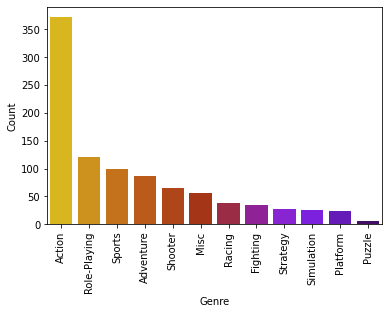

In [368]:
#최근 5년간 출시된 게임의 장르
sns.barplot(data=genre_s,x="index",y="Genre",palette='gnuplot_r')
plt.xticks(rotation =90)
plt.xlabel('Genre')
plt.ylabel('Count')

In [ ]:
paltform_s = pd.DataFrame(df_sales_new['Platform'].value_counts()).reset_index()
paltform_s

Text(0, 0.5, 'Count')

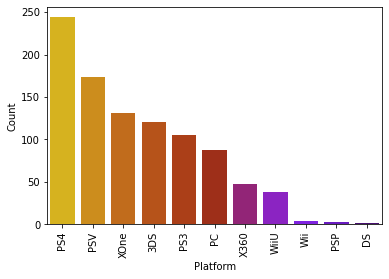

In [367]:
#최근 5년간 출시된 게임의 플랫폼
sns.barplot(data=paltform_s,x="index",y="Platform",palette='gnuplot_r')
plt.xticks(rotation =90)
plt.xlabel('Platform')
plt.ylabel('Count')

In [267]:
#최근 5년간 출고량이 1M이상인 게임들
mask = (df_sales_new['total_sales'] > 1000)
df_sales_new_filter = df_sales_new.loc[mask, : ]
df_sales_new_filter

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770,5810,350,2310,14240
1,FIFA 16,PS4,2015,Sports,Electronic Arts,1110,6060,60,1260,8490
2,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2930,3290,220,1230,7670
3,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4520,2090,10,670,7290
4,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2470,3150,240,1100,6960
...,...,...,...,...,...,...,...,...,...,...
70,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,Nintendo,520,330,170,80,1100
71,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,360,640,0,80,1080
72,Naruto Shippuden: Ultimate Ninja Storm 4,PS4,2016,Fighting,Namco Bandai Games,390,410,100,160,1060
73,Dragon Ball: XenoVerse,PS4,2015,Fighting,Namco Bandai Games,300,480,120,150,1050


## 데이터 정리하기
- 닌텐도계열 : DS, Wii, GBA, 3DS, WiiU, GB, NES, N64
- PS계열 : PSP, PS3, PS, PS4, PS2, PSV
- XBOX계열 : XB, X360, XOne

In [275]:
df_sales_new_filter['Platform'].value_counts()

PS4     37
XOne    19
3DS      8
WiiU     4
PC       2
X360     2
PS3      2
Wii      1
Name: Platform, dtype: int64

In [283]:
# l = len(df_sales_new_filter['Platform'])
df_sales_new_filter['Platform'][0].startswith('PS')

True

In [ ]:
new_platform = []

for i in range(l):
  if df_sales_new_filter['Platform'][i].startswith('PS'):
    new_platform.append('PS')
  elif df_sales_new_filter['Platform'][i].startswith('X'):
    new_platform.append('XBOX')
  elif df_sales_new_filter['Platform'][i].startswith('PC'):
    new_platform.append('PC')
  else:
    new_platform.append('Nintendo')
new_platform

In [286]:
df_sales_new_filter['new_platform'] = new_platform
df_sales_new_filter

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,new_platform
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770,5810,350,2310,14240,PS
1,FIFA 16,PS4,2015,Sports,Electronic Arts,1110,6060,60,1260,8490,PS
2,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2930,3290,220,1230,7670,PS
3,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4520,2090,10,670,7290,XBOX
4,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2470,3150,240,1100,6960,PS
...,...,...,...,...,...,...,...,...,...,...,...
70,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,Nintendo,520,330,170,80,1100,Nintendo
71,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,360,640,0,80,1080,PC
72,Naruto Shippuden: Ultimate Ninja Storm 4,PS4,2016,Fighting,Namco Bandai Games,390,410,100,160,1060,PS
73,Dragon Ball: XenoVerse,PS4,2015,Fighting,Namco Bandai Games,300,480,120,150,1050,PS


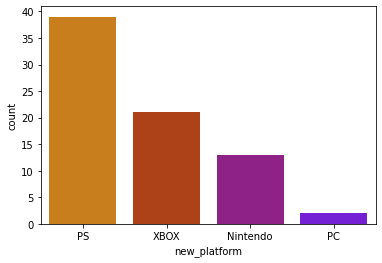

In [366]:
#최근 5년간 출고량이 1M이상인 게임들의 주요 플랫폼
sns.countplot(x='new_platform', data=df_sales_new_filter,palette='gnuplot_r')

PS게임이 압도적으로 많으나 가장 최근 출시된 게임이 닌텐도 DS와 관련된 게임이므로 닌텐도 플랫폼을 주시하여야 한다. -> 최근 동물의숲, 닌텐도 스위치의 등장으로 닌텐도의 향후 전망도 기대해볼만 하다.


In [314]:

ch_n = df_sales_new_filter.sort_values('NA_Sales',ascending=False)[:3]
ch_n = ch_n[['Genre','NA_Sales']]
ch1_n = df_sales_new_filter.sort_values('EU_Sales',ascending=False)[:3]
ch1_n = ch1_n[['Genre','EU_Sales']]
ch2_n = df_sales_new_filter.sort_values('JP_Sales',ascending=False)[:3]
ch2_n = ch2_n[['Genre','JP_Sales']]
ch3_n = df_sales_new_filter.sort_values('Other_Sales',ascending=False)[:3]
ch3_n = ch3_n[['Genre','Other_Sales']]
chart2 = pd.concat([ch_n,ch1_n,ch2_n,ch3_n],ignore_index=True)
chart2 = pd.melt(chart2, id_vars=['Genre'],value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']).dropna()
chart2

,Genre,variable,value
0,Shooter,NA_Sales,5770.0
1,Shooter,NA_Sales,4520.0
2,Shooter,NA_Sales,2930.0
15,Sports,EU_Sales,6060.0
16,Shooter,EU_Sales,5810.0
17,Sports,EU_Sales,3750.0
30,Action,JP_Sales,2780.0
31,Action,JP_Sales,2280.0
32,Shooter,JP_Sales,1440.0
45,Shooter,Other_Sales,2310.0


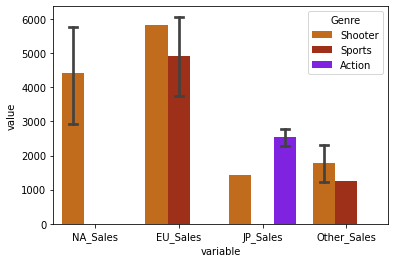

In [365]:
sns.barplot(data=chart2,x='variable', y='value', hue='Genre',capsize=0.1,palette='gnuplot_r')

In [338]:
#국가별 출고량 분포표 -> 어떤 시장 공략이 좋을지
ps_na = pd.DataFrame(df_sales_new_filter['NA_Sales'].groupby(df_sales_new_filter['new_platform']).sum())
gs_na = pd.DataFrame(df_sales_new_filter['NA_Sales'].groupby(df_sales_new_filter['Genre']).sum())

ps_eu = pd.DataFrame(df_sales_new_filter['EU_Sales'].groupby(df_sales_new_filter['new_platform']).sum())
gs_eu = pd.DataFrame(df_sales_new_filter['EU_Sales'].groupby(df_sales_new_filter['Genre']).sum())

ps_jp = pd.DataFrame(df_sales_new_filter['JP_Sales'].groupby(df_sales_new_filter['new_platform']).sum())
gs_jp = pd.DataFrame(df_sales_new_filter['JP_Sales'].groupby(df_sales_new_filter['Genre']).sum())

ps_oth = pd.DataFrame(df_sales_new_filter['Other_Sales'].groupby(df_sales_new_filter['new_platform']).sum())
gs_oth = pd.DataFrame(df_sales_new_filter['Other_Sales'].groupby(df_sales_new_filter['Genre']).sum())

In [356]:
ps = pd.concat([ps_na,ps_eu,ps_jp,ps_oth],axis=1).reset_index()
ps

,new_platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Nintendo,8100,6170,11930,1530
1,PC,860,1270,0,180
2,PS,40440,54720,3880,18510
3,XBOX,28410,16210,130,4420


In [358]:
ps1 = ps.melt(id_vars='new_platform',value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
ps1

,new_platform,variable,value
0,Nintendo,NA_Sales,8100
1,PC,NA_Sales,860
2,PS,NA_Sales,40440
3,XBOX,NA_Sales,28410
4,Nintendo,EU_Sales,6170
5,PC,EU_Sales,1270
6,PS,EU_Sales,54720
7,XBOX,EU_Sales,16210
8,Nintendo,JP_Sales,11930
9,PC,JP_Sales,0


([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

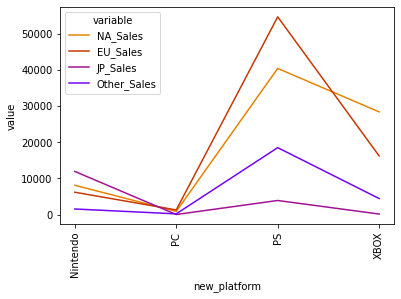

In [363]:
sns.lineplot(data=ps1, x='new_platform',y='value',hue='variable',palette='gnuplot_r')
plt.xticks(rotation =90)

In [344]:
gs = pd.concat([gs_na,gs_eu,gs_jp,gs_oth],axis=1).reset_index()
gs

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,11650,13420,7990,4230
1,Adventure,970,1530,70,350
2,Fighting,3160,1860,220,910
3,Misc,1210,1090,240,210
4,Platform,2110,1980,1080,480
5,Racing,1350,3070,100,650
6,Role-Playing,10220,9640,1640,3030
7,Shooter,32310,26620,3010,9410
8,Simulation,470,1000,1390,120
9,Sports,14360,18160,200,5250


In [348]:
gs1 = gs.melt(id_vars='Genre',value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

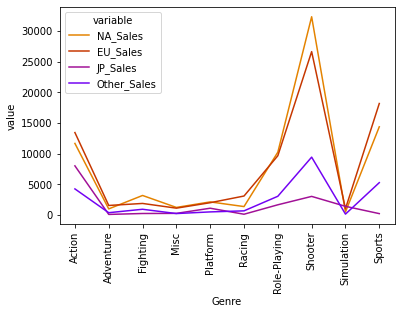

In [374]:
sns.lineplot(data=gs1, x='Genre',y='value',hue='variable',palette='gnuplot_r')
plt.xticks(rotation =90)

In [384]:
df_sales_new_filter.head(50)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,new_platform
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770,5810,350,2310,14240,PS
1,FIFA 16,PS4,2015,Sports,Electronic Arts,1110,6060,60,1260,8490,PS
2,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2930,3290,220,1230,7670,PS
3,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4520,2090,10,670,7290,XBOX
4,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2470,3150,240,1100,6960,PS
5,FIFA 17,PS4,2016,Sports,Electronic Arts,280,3750,60,690,4780,PS
6,Splatoon,WiiU,2015,Shooter,Nintendo,1550,1150,1440,430,4570,Nintendo
7,Uncharted: The Nathan Drake Collection,PS4,2015,Action,Sony Computer Entertainment,1960,1690,80,740,4470,PS
8,Halo 5: Guardians,XOne,2015,Shooter,Microsoft Game Studios,2640,1200,30,390,4260,XBOX
9,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1300,2070,180,650,4200,PS


In [ ]:
#PCA 어디에?
#clustering 어떻게?